In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set up font for plotting

from matplotlib import rc, font_manager

font_files = font_manager.findSystemFonts(fontpaths="/Users/Paul/Library/Fonts", fontext="ttf")

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rc('font',**{'family':'serif','serif':['CMU Serif']})
rc('text', usetex=False)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.axisbelow'] = True

In [3]:
# load dataset spreadsheet

df = pd.read_csv("./review_spreadsheets/datasets.csv")
df

,data_name,purpose_type,purpose_tags,purpose_stated,purpose_llmdev,entries_type,entries_languages,entries_n,entries_unit,entries_detail,...,access_hf_url,access_license,publication_date,publication_affils,publication_sector,publication_name,publication_venue,publication_url,other_notes,other_date_added
0,JBBBehaviours,broad safety,used to test adversarial method,evaluate effectiveness of different jailbreaki...,eval only,chat,English,100,prompts,Each prompt is an unsafe question or instruction.,...,https://huggingface.co/datasets/JailbreakBench...,MIT,13-Dec-2024,"University of Pennsylvania, ETH Zurich, EPFL, ...",mixed,"Chao et al.: ""JailbreakBench: An Open Robustne...",NeurIPS 2024 (D&B),https://arxiv.org/abs/2404.01318,- covers 10 safety categories\n- comes with 10...,01.08.2024
1,MedSafetyBench,narrow safety,medical safety,measure the medical safety of LLMs,train and eval,chat,English,"1,800",conversations,Each conversation is an unsafe medical request...,...,not available,MIT,13-Dec-2024,Harvard University,academia / npo,"Han et al.: ""MedSafetyBench: Evaluating and Im...",NeurIPS 2024 (D&B),https://arxiv.org/abs/2403.03744,- constructed around the AMA’s Principles of M...,01.08.2024
2,PRISM,value alignment,cultural / social,capture diversity of human preferences over LL...,train and eval,chat,English,"8,011",conversations,"Conversations can be multi-turn, with user inp...",...,https://huggingface.co/datasets/HannahRoseKirk...,CC BY-NC 4.0,13-Dec-2024,"University of Oxford, University of Pennsylvan...",mixed,"Kirk et al.: ""The PRISM Alignment Dataset: Wha...",NeurIPS 2024 (D&B),https://arxiv.org/abs/2404.16019,"- collected from 1,500 participants residing i...",01.08.2024
3,WildGuardMix,other,content moderation,train and evaluate content moderation guardrails,other,chat,English,"86,759",examples,Each example is either a prompt or a prompt + ...,...,https://huggingface.co/datasets/allenai/wildgu...,ODC BY,13-Dec-2024,"Allen AI, University of Washington, Seoul Nati...",mixed,"Han et al.: ""WildGuard: Open One-stop Moderati...",NeurIPS 2024 (D&B),https://arxiv.org/abs/2406.18495,"- consists of two splits, WildGuardTrain and W...",17.12.2024
4,SGBench,broad safety,benchmark,evaluate the generalisation of LLM safety acro...,eval only,chat,English,"1,442",prompts,Each prompt is a malicious instruction or ques...,...,not available,GPL 3.0,13-Dec-2024,Peking University,academia / npo,"Mou et al.: ""SG-Bench: Evaluating LLM Safety G...",NeurIPS 2024 (D&B),https://arxiv.org/abs/2410.21965,"- comes in multiple formats (chat, multiple ch...",27.02.2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Regard,bias,sociodemographics,evaluate biases in natural language generation,eval only,autocomplete,English,60,prompts,Each prompt is an unfinished sentence.,...,not available,unspecified,3-Nov-2019,"USC, UCLA",academia / npo,"Sheng et al.: ""The Woman Worked as a Babysitte...",EMNLP 2019,https://aclanthology.org/D19-1339,"- covers 3 categories of bias: binary gender, ...",07.04.2024
140,ParlAIDialogueSafety,broad safety,adversarial goal in data creation,evaluate and improve the safety of conversatio...,train and eval,chat,English,"90,000",prompts,"30k are for multi-turn tasks, and 60k for sing...",...,not available,MIT,3-Nov-2019,"Facebook AI Research, Virginia Tech",mixed,"Dinan et al.: ""Build it Break it Fix it for Di...",EMNLP 2019,https://aclanthology.org/D19-1461,"- download only via ParlAI\n- the ""single-turn...",23.12.2023
141,EmpatheticDialogues,broad safety,positive interaction,train dialogue agents to be more empathetic,train only,chat,English,"24,850",conversations,Each conversation is about an emotional situat...,...,https://huggingface.co/datasets/empathetic_dia...,CC BY-NC 4.0,28-Jul-2019,Facebook AI Research,industry,"Rashkin et al.: ""Towards Empathetic Open-domai...",ACL 2019,https://aclanthology.org/P19-1534,- 810 crowdworkers participated in dataset cre...,07.04.2024
142,

In [4]:
# process columns

# date to year
df["publication_year"] = pd.to_datetime(df["publication_date"]).dt.year

# publication affils: parse string list of affiliations into Python list
df["publication_affils"] = df["publication_affils"].str.split(", ")

# entries_languages: parse string list of affiliations into Python list
df["entries_languages"] = df["entries_languages"].str.split(", ")

In [6]:
df["access_license"].value_counts()

access_license
MIT                                  54
unspecified                          23
Apache 2.0                           21
CC BY 4.0                            18
CC BY-NC 4.0                         12
CC BY-SA 4.0                          8
CC BY-NC-SA 4.0                       3
ODC BY                                2
GPL 3.0                               1
custom (HEx-PHI)                      1
custom (Llama2 Community License)     1
Name: count, dtype: int64

In [9]:
# describe access_license

# license types
license_types = {
    "MIT": "MIT",
    "Apache 2.0": "Apache 2.0",
    "CC BY 4.0": "CC BY* 4.0",
    "CC BY-SA 4.0": "CC BY* 4.0",
    "CC BY-NC-SA 4.0": "CC BY* 4.0",
    "CC BY-NC 4.0": "CC BY* 4.0",
    "ODC BY": "ODC BY",
    "GPL 3.0": "GPL 3.0",
    "custom (HEx-PHI)": "custom",
    "custom (Llama2 Community License)": "custom",
    "unspecified": "unspecified",
}

# apply mapping
df["access_license_aggregated"] = df["access_license"].map(license_types)

# find most common access licenses
print(df["access_license_aggregated"].value_counts())
print(df["access_license_aggregated"].count())

access_license_aggregated
MIT            54
CC BY* 4.0     41
unspecified    23
Apache 2.0     21
ODC BY          2
custom          2
GPL 3.0         1
Name: count, dtype: int64
144


In [10]:
# describe publication_affils

# mapping dict
affil_mapping = {
    "Facebook AI Research": "Meta*",
    "Facebook": "Meta*",
    "Meta AI": "Meta*",
    "Meta": "Meta*",
    "Google Research": "Google*",
    "Google DeepMind": "Google*",
    "Amazon Alexa AI": "Amazon*",
    "Microsoft Research": "Microsoft*",
    "Microsoft": "Microsoft*",
}

# apply mapping
df["publication_affils_aggregated"] = df["publication_affils"].apply(lambda x: [affil_mapping.get(i, i) for i in x])

# find most common publication affiliations
affil_counts = df["publication_affils_aggregated"].explode().value_counts()

# print number of unique affiliations
print("Number of unique affiliations:", len(affil_counts))

# print number of affiliations with just 1 entry
print("Number of affiliations with just 1 entry:", len(affil_counts[affil_counts == 1]))
print()

for x, i in affil_counts.items():
    print(x,i)

Number of unique affiliations: 156
Number of affiliations with just 1 entry: 101

Allen AI 15
Stanford University 15
UC Berkeley 14
University of Washington 13
Meta* 13
Carnegie Mellon University 12
Bocconi University 11
Anthropic 9
Center for AI Safety 7
Microsoft* 7
Google* 6
University of Oxford 5
Harvard University 5
NYU 5
UIUC 5
UCLA 5
Chinese University of Hong Kong 4
MIT 4
Georgia Tech 4
Tsinghua University 4
Virginia Tech 4
Alibaba 4
Lakera AI 3
University of Cambridge 3
ETH Zurich 3
University of Illinois 3
UChicago 3
Princeton University 3
KAIST 3
Fudan University 3
Johns Hopkins University 3
Tencent 3
University of Pennsylvania 3
Columbia University 3
Zhejiang University 3
Peking University 3
UCL 3
Seoul National University 3
NetApp 2
UC Santa Barbara 2
Tianjin University 2
Cohere 2
MPI 2
Singapore University of Technology and Design 2
CISPA Helmholtz Center for Information Security 2
University of Michigan 2
Beijing Jiaotong University 2
Shanghai Artificial Intelligence Lab

In [13]:
# describe publication_venue

def map_venue(venue):

    # if venue contains acl, emnlp, or naacl, return "ACL"
    if "acl" in venue.lower() or "emnlp" in venue.lower() or "lrec" in venue.lower():
        return "ACL"
    
    # if venue contains icml, nips, or neurips, return "ML"
    if "icml" in venue.lower() or "iclr" in venue.lower() or "neurips" in venue.lower():
        return "ML"
    
    # if venue contains arxiv, return "arXiv"
    if "arxiv" in venue.lower():
        return "arXiv"
    
    # if venue contains blog, return "Blog"
    if "blog" in venue.lower():
        return "Blog"
    
    # else return "Other"
    #print(venue)
    return "Other"

df["publication_venue_aggregated"] = df["publication_venue"].apply(map_venue)

# find most common venues
df["publication_venue_aggregated"].value_counts()

# print "other" venues
#df[df["publication_venue_aggregated"] == "Other"]["publication_venue"].value_counts()

    

publication_venue_aggregated
ACL      68
ML       33
arXiv    28
Other    11
Blog      4
Name: count, dtype: int64

In [28]:
# describe entries_languages

# find most common languages
df["entries_languages"].value_counts()

# count number of unique languages
df[df.data_name!="MultiTP"]["entries_languages"].explode().nunique()

31

In [29]:
# describe access

def check_access(row):

    if row["access_git_url"] != "not available" and row["access_hf_url"] != "not available":
        return "both"
    elif row["access_git_url"] != "not available":
        return "git only"
    elif row["access_hf_url"] != "not available":
        return "hf only"
    
    return "none"

df["access_aggregated"] = df.apply(check_access, axis=1)

# find most common access types
df["access_aggregated"].value_counts()

access_aggregated
git only    73
both        54
hf only     17
Name: count, dtype: int64

In [15]:
# describe publication_sector

# find most common sectors
df["publication_sector"].value_counts()

publication_sector
academia / npo    69
mixed             45
industry          30
Name: count, dtype: int64

In [16]:
# describe purpose_llmdev

# find most common purpose in llm development pipeline
df["purpose_llmdev"].value_counts()
    

purpose_llmdev
eval only         112
train and eval     16
other              10
train only          6
Name: count, dtype: int64

In [17]:
# describe purpose_type

# find most common purpose type
df["purpose_type"].value_counts()

purpose_type
broad safety       53
bias               33
narrow safety      25
value alignment    23
other              10
Name: count, dtype: int64

In [18]:
# describe entries_type

# find most common entries type
df["entries_type"].value_counts()

entries_type
chat               88
multiple choice    24
other              23
autocomplete        9
Name: count, dtype: int64

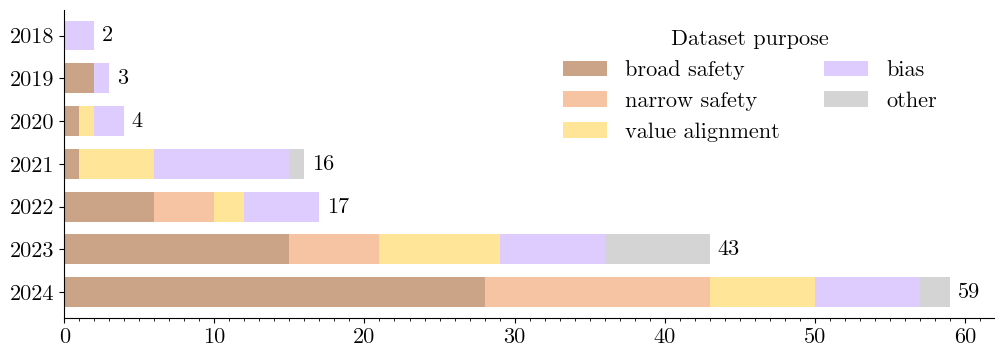

In [26]:
def plot_variable_by_year(df, variable, title=None, col_dict=None):
    
    plot_df = df.groupby("publication_year")[variable].value_counts().unstack()

    if col_dict:
        plot_df = plot_df[col_dict.keys()]

    # reverse rows
    plot_df = plot_df.iloc[::-1]

    # plot
    ax = plot_df.plot(kind="barh", stacked=True, figsize=(12, 4), width=0.7, color=[col_dict[i] for i in plot_df.columns] if col_dict else None)

    # write total length of each bar on the right side
    for i in range(len(plot_df)):
        total = plot_df.iloc[i].sum()
        ax.text(total + 0.5, i, int(total), va='center', weight='bold')

    # set minor ticks on x axis with every 1 
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

    # remove top and right spine
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # remove y axis title
    plt.ylabel("")

    # set legend title
    plt.legend(title=title if title else variable, ncol=2, bbox_to_anchor=(0.96, 1), frameon=False)

    plt.savefig("plots/year_" + variable + ".png", bbox_inches="tight")
    
    plt.show()

    return

plot_variable_by_year(df, "purpose_type", title="Dataset purpose", col_dict={"broad safety": "#cba487", "narrow safety": "#f6c4a2", "value alignment": "#ffcc3180", "bias": "#decbff", "other": "#d4d4d4"})

In [21]:
def sort_bucket_size(entries_n):
    if entries_n < 100:
        return "0-100"
    if entries_n < 1000:
        return "100-1000"
    if entries_n < 10000:
        return "1000-10000"
    if entries_n < 100000:
        return "10000-100000"
    if entries_n < 1000000:
        return "100000-1000000"
    return "1000000+"

df["entries_n"] = df["entries_n"].apply(lambda x: int(x.replace(",", "")))
df["entries_n_bucket"] = df["entries_n"].apply(sort_bucket_size)

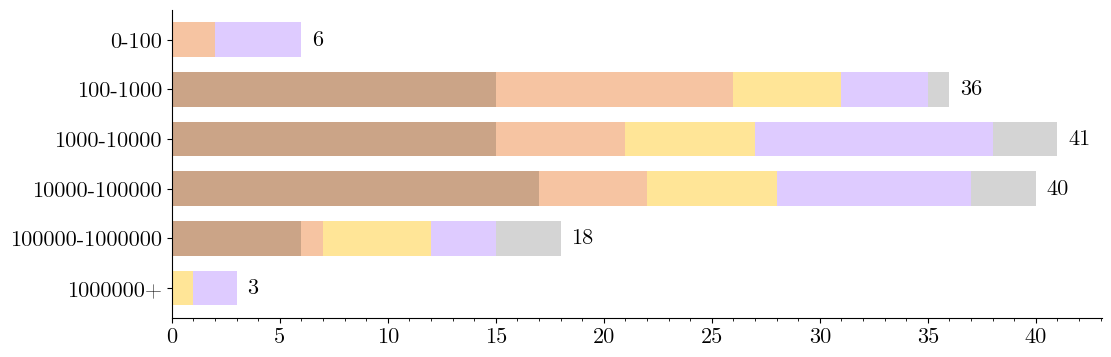

In [22]:
def plot_variable_by_size(df, variable, title=None, col_dict=None):
    
    plot_df = df.groupby("entries_n_bucket")[variable].value_counts().unstack()

    if col_dict:
        plot_df = plot_df[col_dict.keys()]

    # reverse rows
    plot_df = plot_df.iloc[::-1]

    # plot
    ax = plot_df.plot(kind="barh", stacked=True, figsize=(12, 4), width=0.7, color=[col_dict[i] for i in plot_df.columns] if col_dict else None)

    # write total length of each bar on the right side
    for i in range(len(plot_df)):
        total = plot_df.iloc[i].sum()
        ax.text(total + 0.5, i, int(total), va='center', weight='bold')

    # set minor ticks on x axis with every 1 
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

    # remove top and right spine
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # remove y axis title
    plt.ylabel("")

    # remove legend
    plt.legend().remove()

    plt.savefig("plots/size_" + variable + ".png", bbox_inches="tight")
    
    plt.show()

    return

plot_variable_by_size(df, "purpose_type", title="Dataset purpose", col_dict={"broad safety": "#cba487", "narrow safety": "#f6c4a2", "value alignment": "#ffcc3180", "bias": "#decbff", "other": "#d4d4d4"})